## Disney+ launch in Brazil: analyzing conversations on Twitter

Questions to anwser:

- Most engaged users

- To find peaks and specific events that may be related to them

- Verified ccounts

Important notes about the data:
    
- Twitter API returns data considering UTC timezone. The offical Brasilia timezone is -3 UTC. So data appears here with an addition of 3 hours.
- Twitter API does not return all data from each day, but a mix from popular and recent tweets. 
- Specifications of the query: keyword:"DisneyPlus", language: "pt"

## Opening data

In [1]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
path = r'C:\Users\amand\Documents\Jupyter Notebooks\DisneyPlus\data_fulltext_pkl'
all_files = glob.glob(path + "\*.pkl")

all_dfs = []

for f in all_files:
    df = pd.read_pickle(f)
    all_dfs.append(df)
    

In [3]:
data = pd.concat(all_dfs, ignore_index=True)

In [24]:
##Display full text
pd.set_option('display.max_colwidth', None)

## Duplicates

In [4]:
data.duplicated('id').value_counts()

True     91195
False    66127
dtype: int64

In [5]:
data = data.drop_duplicates('id', keep='last')

In [6]:
data = data.sort_values(by='created_at').reset_index()

In [7]:
data.shape

(66127, 19)

In [119]:
#Exporting final data
data.to_pickle('C:/Users/amand/Documents/Jupyter Notebooks/DisneyPlus/data_fulltext_pkl/disneyplus_concat_data.pkl')

## Subsets

In [8]:
## Data without RTs
mask_no_rt = data['retweeted_from_id'] == 0
data_no_rt = data[mask_no_rt].copy()

In [9]:
data_no_rt.head()

,index,user_screen_name,user_id,user_is_verified,retweeted_from_screen_name,retweeted_from_id,retweeted_from_is_verified,screen_name_mention_1,id_mention_1,in_reply_to_screen_name,in_reply_to_user_id,created_at,id,full_text,retweet_full_text,retweet_count,favorite_count,user_followers,user_following
1,95064,disneygobr,1166209969361960960,False,None,0,None,None,0,0,0,2020-11-09 23:14:31,1325939856657289222,Preparem-se para uma missão de outro mundo! 🛸🚀...,None,0,21,1015,69
9,95056,Fe_Spiesz,1131265799715467264,False,None,0,None,gugumorta,878622071886159872,gugumorta,878622071886159872,2020-11-09 23:26:26,1325942857883152385,@gugumorta @XboxGamePass @disneyplus Calma com...,None,0,0,55,95
16,95049,Multiverso_N,1301178933539414018,False,None,0,None,None,0,0,0,2020-11-09 23:34:28,1325944877784444928,"Confira o Trailer Dublado de ‘Phineas e Ferb, ...",None,1,1,64,87
21,95044,martinelli_edm,854115668865818628,False,None,0,None,None,0,0,0,2020-11-09 23:43:30,1325947152649084936,Quem vai dividir a assinatura do Disneyplus cmg?,None,0,0,200,624
25,95040,dayaninhasantos,869790306,False,None,0,None,VRocha777,824596445277872132,VRocha777,824596445277872132,2020-11-09 23:46:48,1325947981003153409,@VRocha777 Não vai ficar nada de bom! \nPesqui...,None,0,1,107,261


## Users - Overview

- We can observe that there are different kinds of users in this list: streaming services(globoplay, DisneyPlusBR), e-commerce(MercadoLivre), app store(GooglePlay), guides (guiadisneyplus, disneygobr), fan accounts for the tv show Bia (nessavcb, irmasurquiza), k-pop fans(GIFT4EHYUNG, pjmsmilez, PRINC3JIKK).

- Globoplay and Disney+ made a partership allowing customers to sign up for both of their services for a special price. 
- Considering the number of tweets about it, we can observe that Globoplay invested in interactions with their potential customers.

- The text reveals another partnership, this time with Mercado Livre, an e-commerce platform. 
- The offer included up to 6 months of Disney+ for free for customers with a certain number of points on its loyalty program, called Mercado Pontos.

In [10]:
#Number of users considering RTs
data.user_id.unique().shape

(41209,)

In [11]:
# Number of users, excluding RTs
data_no_rt.user_id.unique().shape

(13862,)

In [12]:
#Most engaged users, excluding RTs
data_no_rt.user_screen_name.value_counts().head(15).to_frame()

,user_screen_name
globoplay,565
DisneyPlusHelp,348
MercadoLivre,121
disneybrasil,103
nessavcb,93
PRINC3JIKK,92
GIFT4EHYUNG,87
pjmsmilez,61
antzdote,61
mayasdetails,58


In [57]:
#Closer look into why globloplay tweeted about Disney+
mask_globoplay = data_no_rt['user_screen_name'] == 'globoplay'
data_no_rt[mask_globoplay]['full_text'].head()

113                                                                                                                                    @nothertrench Faz seu cadastro que te aviso assim que estiver disponível!  https://t.co/MZU2ZFqq4X ☺️
165                        @GuiAbreu_18 Olá @GuiAbreu_18! Ai, que legal que você se interessou pela nossa parceria! Faz assim, acesse https://t.co/MZU2ZFqq4X para saber antes. No 17 de novembro já poderá dar um plus no seu Globoplay! o/
657                          @babicmello Olá @babicmello! Ai, que legal que você se interessou pela nossa parceria! Faz assim, acesse https://t.co/MZU2ZFqq4X para saber antes. No 17 de novembro já poderá dar um plus no seu Globoplay! o/
1298    @Lola_Daibes Olá @Lola_Daibes! O Upgrade só estará disponível a partir do dia 17 de novembro, mas já você pode realizar o pré-cadastro através do site: https://t.co/MZU2ZFqq4X Vem adicionar um pouco de magia no seu globoplay! =)
1304                       @lucasemrede Olá @lucasem

In [35]:
#Closer look into why Mercado Livre tweeted about Disney+
mask_mercadolivre = data_no_rt['user_screen_name'] == 'MercadoLivre'
data_no_rt[mask_mercadolivre]['full_text'].head()

975                                                                           @feitxza @feitxza, que incrível! Imagina só você ganhando desconto no Disney+ com seu nível no Mercado Pontos? Vem conferir: https://t.co/mgtX3JxZui 💛 💙 \n\n#OMelhorTáChegando
1272                  @annylimabr @annylimabr, ficamos felizes que tenha gostado e vai aproveitar o Disney+!\n\nA partir de 17 de novembro poderá assinar este serviço através do Mercado Livre. Conheça mais: https://t.co/fpn8qGvKvs.\n\nConte com a gente!
1607    @ZukoVyper A partir do dia 17 de novembro, você poderá ver o detalhe dos custos para se inscrever no Disney+ a partir do Mercado Livre com até 6 meses de presente de acordo com o seu nível do Mercado Pontos. Conheça mais: https://t.co/fpn8qGvKvs
2339                 @ZukoVyper @ZukoVyper, você poderá ver o detalhe dos custos para se inscrever no Disney+ a partir do dia 17 de novembro, com até 6 meses de presente de acordo com o seu nível do Mercado Pontos. Conheça mais: https://t

## Tweets histogram

In [56]:
#Historgram considering all data
px.histogram(data.created_at, labels={'value': ''})

## Analyzing Peaks

- RT percentage
- Comments

### Nov 12: from 17 to 18 pm

- Reactions to the realease of the official date of the new Marvel Series Wanda Division

In [36]:
mask_date = (data['created_at'] > '2020-11-12 17:00:00') & (data['created_at'] <= '2020-11-12 17:59:59')
data[mask_date].sort_values(by='favorite_count', ascending=False).full_text.head()

1720                    Chega uma nova era. #WandaVision, uma série original da @MarvelStudios, disponível em 15 de janeiro. Só no #DisneyPlus. https://t.co/IQPqLs2VW0
1584                    E ficou pra 2021 😭\n\nEm novo vídeo, Disney Plus anuncia o lançamento de ‘WandaVision’ para 15 de janeiro de 2021. \n\n https://t.co/GKSoHUJT4O
1633    Uma nova era se inicia. Em novo comercial, @disneyplus anuncia oficialmente o adiamento de "WandaVision" para 15 de janeiro de 2021. 💥🤟 https://t.co/o51A5Qdha8
1611           E teremos que esperar mais um pouco, Wandanation! WandaVision estreará em 15 de janeiro de 2021 com exclusividade no DisneyPlus. https://t.co/mAHJCEAnsh
1902                                                    DATA OFICIAL DE WANDAVISION É DIA 15 DE JANEIRO!!\n\ntristeza define... queria antes... https://t.co/kx194Xt3kD
Name: full_text, dtype: object

### Nov 15: from 2 to 3 am

- People were commenting about Disney+ special launching content that was available on several channels such as YouTube 
and the streaming service of brazilian tv channel GloboPlay

In [38]:
mask2 = (data['created_at'] > '2020-11-15 02:00:00') & (data['created_at'] <= '2020-11-15 02:59:59')
data[mask2].sort_values(by='favorite_count', ascending=False).full_text.head()
.

4395                                                                                  Essa é minha opinião sobre #DisneyPlus https://t.co/ReZv6d8llK
4643    Minha mãe: Violetta é só uma fase \n\nEu com 19 anos quando apareceu Violetta no especial Disney plus: \n#DisneyPlus https://t.co/oikcMr9vky
4495                                        conheçam mais sobre o trabalho da violetta ,hoje em dia ela é a tini #DisneyPlus https://t.co/0nb9MHOE5P
4416         eu quando assistir Hamilton no #DisneyPlus pela primeira vez fingindo que nunca vi o bootleg e o proshotnpirata https://t.co/aDsa6meHQZ
4327                                    #DisneyPlus ain gente alguém me empresta pra eu assitir feiticeiros de waverly place https://t.co/7RtyO6DHuF
Name: full_text, dtype: object

In [58]:
# Nov 17 from 3 to 4 am

mask3 = (data['created_at'] > '2020-11-17 03:00:00') & (data['created_at'] <= '2020-11-17 03:59:59')
data[mask3].sort_values(by='favorite_count', ascending=False).full_text.head(10)

## The countdown for the app realease. 
## Some fans seemed disappointed because the app was not realeased at midnight.

12789                                                                                                                                        Hannah Montana, os feiticeiros de Waverly Place e zack &amp; cody chegando no disney plus sabendo que vai ser os mais assistidos \n#DisneyPlus \nhttps://t.co/AGgr15I9x1
13026                                                                                                                                                                          Eu: nossa quando der 00:01 vou baixar o app da #DisneyPlus e vou fazer a maratona de filmes, né! \n\nA Disney: https://t.co/95FAXCRriR
12302                                                               ✨ Os sonhos são reais e tão mais perto que nunca! ✨\n\nO meu combo Globoplay e Disney+ vai estar disponível amanhã, a partir das 9h.\nFaz seu cadastro aqui: https://t.co/MZU2ZFqq4X. Vou te avisar assim que estiver disponível. #TheMandalorian
12248                                                            E vam

In [48]:
## Nov 17 from 12 to 13 pm

mask4 = (data['created_at'] > '2020-11-17 12:00:00') & (data['created_at'] <= '2020-11-17 12:59:59')
data[mask4].sort_values(by='favorite_count', ascending=False).full_text.head()

## Official launch: content available

16958                                 O grande dia finalmente chegou. E este post talvez seja a última coisa que você vai ver antes de entrar no #DisneyPlus, então, aproveitando: use #QueroVerPrimeiro e conte pra gente o que você vai ver! 😉 https://t.co/2ctqjHlyNS
16526                                                                                                                                                                           eu pedindo conta pra dividir com quem assinou o #DisneyPlus. \n\nhttps://t.co/Sjrgy3ijFX
17275                                                                          Voz da minha consciência: você conseguiu tudo que queria?\n\nEu: sim\n\nVoz da minha consciência: E o que te custou?\n\nEu: Tudo....\n\n#DisneyPlus #DisneyPlusBR https://t.co/z8TajHEgbg
16847                                                                                                                                                                          Eu acordando e lembrando que n

In [49]:
## Nov 17 from 12 to 13 pm

mask5 = (data['created_at'] > '2020-11-17 15:00:00') & (data['created_at'] <= '2020-11-17 15:59:59')
data[mask5].sort_values(by='favorite_count', ascending=False).full_text.head()
## Official launch: content available Part2

24631                                                                   E eu acho q a netflix vai ter um relacionamento sério com o Disney plus kkkkkkk #DisneyPlus https://t.co/Fnoiq5VZPa
21894                                                                                          Só existe uma maneira certa de começar o #DisneyPlus. Problematizem. https://t.co/lnAQjdpBjQ
22037                                                              Alguém me dá de presente uma conta no Disney plus, é só o que eu peço no dia de hoje #DisneyPlus https://t.co/EKplHK0fUN
23224    mano to com umas conta de disney plus sobrando vou dar p alguns que derem RT/FAV nesse tweet \numas 14:00 ou 14:30 eu escolho aleatoriamente \n#DisneyPlus https://t.co/uuc57eqTkX
23780               se esse post chegar a 500 curtidas passo minhas 5 contas do disney plus. #DisneyPlus #DisneyPlusBR #disneyplusbrasil #disneyplusaccount #Marvel https://t.co/M97RomsYhr
Name: full_text, dtype: object

In [50]:
## Nov 18 from 0 to 1 am

mask6 = (data['created_at'] > '2020-11-18 00:00:00') & (data['created_at'] <= '2020-11-18 00:59:59')
data[mask6].sort_values(by='favorite_count', ascending=False).full_text.head()

## Official launch: content available

45010                                           vou dar conta Disney+ para todos que derem RT/FAV nesse tweet (tem que estar me seguindo e ativar as notificações) #DisneyPlus https://t.co/4sdCIIjU2D
45641                                                                                  Vou da conta Disney+ para todos que de RT e Curti! Tem que tá me seguindo!  #DisneyPlus https://t.co/dOLtz8crlp
44077                 🎞️ 5° SORTEIO DE DISNEY+ 🎞️\n\n🎞️ 4 GANHADORES 🎞️\n\n🎞️ REGRAS : RT e FAV E TEM QUE ESTAR SEGUINDO \n@enquetesfarm\n\n🎞️ ENCERRA ÀS 21:20\n\n#DisneyPlus https://t.co/DE4tLM2KKJ
45900    vou dar o acesso de uma das contas que eu consegui fo Disney+ para uma pessoa. basta RT/FAV nesse tweet e me seguir #DisneyPlus\n\no resultado sai as 22:30 de hoje 🍀 https://t.co/m0y2891eRH
45414                                                                                                 algum coração caridoso para emprestar a #DisneyPlus p amiguinho aqui? 😭🥺 https://t.co/OjjLclzqum
Name:

In [51]:
## Nov 18 from 17 to 18 pm

mask7 = (data['created_at'] > '2020-11-18 17:00:00') & (data['created_at'] <= '2020-11-18 17:59:59')
data[mask7].sort_values(by='favorite_count', ascending=False).full_text.head()
## Official launch: content available

58388                                                                                                                                                           vou dar conta para todos que RT/FAV esse tweet (tem que estar me seguindo e ativado as notificações) #DisneyPlus https://t.co/pumj6FSbG9
59009                                                                                                         Destino: O Mundo Maravilhoso de Mickey Mouse! 🚙 Assista à nova série de animação Original e comemore o aniversário do Mickey. Disponível agora. Só no #DisneyPlus. https://t.co/wMtPjVSWFI
59027                                                                                                   🎞 SORTEIO DISNEY PLUS 🎞\n\n• RT\n• FAV\n• SEGUIR O MEU PERFIL\n• COMENTAR ALGO\n\ntenho 7 contas com 6 lugares, aproveitem! #DisneyPlus \n\n(resultado depois de 1 hora) https://t.co/7xs1ZIZ0Np
58358                                                                                                        

## Rall of fame publications

Most Retweeted Posts

- One of the most retweeted publications was about caracteristcs of the old movies tapes

- People promising disney accounts for free

- Asking about others people accounts





In [26]:
#Most retweeted publication
data.sort_values('retweet_count', ascending=False).head(1).retweet_full_text

37265    GALERA, AVISO:\nAntes de dar play em qualquer filme do #DisneyPlus, favor VERIFICAR:\n- A marca indelével na parte superior;\n- O selo da UBV na lombada;\n- O holograma com o Mickey Feiticeiro; https://t.co/aN8O29e5TD
Name: retweet_full_text, dtype: object

In [27]:
# Most liked publication 
data.sort_values('favorite_count', ascending=False).head(1).full_text

16958    O grande dia finalmente chegou. E este post talvez seja a última coisa que você vai ver antes de entrar no #DisneyPlus, então, aproveitando: use #QueroVerPrimeiro e conte pra gente o que você vai ver! 😉 https://t.co/2ctqjHlyNS
Name: full_text, dtype: object

## Verified accounts

- Verified accounts that tweeted about DisneyPlus

- Some accounts were expected to appear on that list, because they are Disney+ partners: 

    - RedeGlobo, for example, is the company that owns GloboPlay, a sreaming service that made a partnetship with Disney+.
    - Claudia Leitte and Dani Calabresa are brazilian artists who participated on the special show produced for the app launch in Brazil.
    - FoxSportsBrazil and ESPN are part of the Disney Companies.

- We can also see media and journalists specialized on movies/tv.

    - Omelete is a blog specialized on movies and tv.
    - Antonio Tabet is a



In [28]:
verified = data['user_is_verified'] == True

#Verified accounts who tweeted about Disney+ by number of tweets
data[verified]['user_screen_name'].value_counts().head(20).to_frame()

,user_screen_name
globoplay,565
DisneyPlusHelp,348
MercadoLivre,121
GooglePlay,55
DisneyPlusBR,51
MercadoPagoBR,31
ren4n,21
todateen,9
Bradesco,7
thiagoromariz,7


In [29]:
#Most followed verified accounts
data[verified].sort_values(by='user_followers', ascending=False).user_screen_name.unique()[:10]

array(['ClaudiaLeitte', 'RedeGlobo', 'GooglePlay', 'revistasuper',
       'antoniotabet', 'calabresadani', 'FoxSportsBrasil', 'ESPNBrasil',
       'omelete', 'otaviano'], dtype=object)

In [30]:
user_mask = data['user_screen_name'] == 'otaviano'
data[user_mask].full_text

24067    Adeus vida social. Adeus @FlaviaAleReal. Olá maratona de tudo da Marvel e Star Wars 🥰 #DisneyPlus
Name: full_text, dtype: object

## Interactions

In [31]:
# Get the interactions between the different users
def get_interactions(row):
    # From every row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    user = row["user_id"], row["user_screen_name"]
    # Be careful if there is no user id
    if user[0] is None:
        return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    
    # Add all interactions 
    # First, we add the interactions corresponding to replies adding the id and screen_name
    interactions.add((row["in_reply_to_user_id"], row["in_reply_to_screen_name"]))
    # After that, we add the interactions with retweets
    interactions.add((row["retweeted_from_id"], row["retweeted_from_screen_name"]))
    # And later, the interactions with user mentions
    interactions.add((row["id_mention_1"], row["screen_name_mention_1"]))
    
    # Discard if user id is in interactions
    interactions.discard((row["user_id"], row["user_screen_name"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

In [32]:
data.columns

Index(['index', 'user_screen_name', 'user_id', 'user_is_verified',
       'retweeted_from_screen_name', 'retweeted_from_id',
       'retweeted_from_is_verified', 'screen_name_mention_1', 'id_mention_1',
       'in_reply_to_screen_name', 'in_reply_to_user_id', 'created_at', 'id',
       'full_text', 'retweet_full_text', 'retweet_count', 'favorite_count',
       'user_followers', 'user_following'],
      dtype='object')

In [112]:
subset[subset.user_screen_name == 'disneygobr'].retweeted_from_screen_name

1     0
47    0
Name: retweeted_from_screen_name, dtype: object

In [86]:
interactions = []

for index, row in subset.iterrows():
    user_sn = row['user_screen_name']
    retweet_from = row['retweeted_from_screen_name']
    reply_to = row['in_reply_to_screen_name']
    mention = row['screen_name_mention_1']
    

    interactions.append((user_sn, retweet_from))
    interactions.append((user_sn, reply_to))
    interactions.append((user_sn, mention))

In [70]:
subset= data.head(50).copy()

subset=subset.replace('None', 0)
subset= subset.fillna(0)

In [87]:
interactions

[('rroba_Piietro', 'DisneyPlusBR'),
 ('rroba_Piietro', 0),
 ('rroba_Piietro', 'DisneyPlusBR'),
 ('disneygobr', 0),
 ('disneygobr', 0),
 ('disneygobr', 0),
 ('agustdisney', 'almanaquedisney'),
 ('agustdisney', 0),
 ('agustdisney', 'almanaquedisney'),
 ('DayaneFMelo', 'DisneyPlusBR'),
 ('DayaneFMelo', 0),
 ('DayaneFMelo', 'DisneyPlusBR'),
 ('edvaldo7neto', 'DisneyPlusBR'),
 ('edvaldo7neto', 0),
 ('edvaldo7neto', 'DisneyPlusBR'),
 ('brunolsoficial', 'DisneyPlusBR'),
 ('brunolsoficial', 0),
 ('brunolsoficial', 'DisneyPlusBR'),
 ('EuFernandaCruz', 'DisneyPlusBR'),
 ('EuFernandaCruz', 0),
 ('EuFernandaCruz', 'DisneyPlusBR'),
 ('amigosbh_sandy', 'DisneyPlusBR'),
 ('amigosbh_sandy', 0),
 ('amigosbh_sandy', 'DisneyPlusBR'),
 ('DaviChaves1', 'DisneyPlusBR'),
 ('DaviChaves1', 0),
 ('DaviChaves1', 'DisneyPlusBR'),
 ('Fe_Spiesz', 0),
 ('Fe_Spiesz', 'gugumorta'),
 ('Fe_Spiesz', 'gugumorta'),
 ('DouglasBfs', 'DisneyPlusBR'),
 ('DouglasBfs', 0),
 ('DouglasBfs', 'DisneyPlusBR'),
 ('Ju_assmann', 'Disney

In [113]:
for i in interactions:
    if i[1] == 0 or i[1]== '0' or i[1]== ' 0' :
        interactions.remove(i)

In [116]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   index                       50 non-null     int64         
 1   user_screen_name            50 non-null     object        
 2   user_id                     50 non-null     object        
 3   user_is_verified            50 non-null     bool          
 4   retweeted_from_screen_name  50 non-null     object        
 5   retweeted_from_id           50 non-null     object        
 6   retweeted_from_is_verified  50 non-null     object        
 7   screen_name_mention_1       50 non-null     object        
 8   id_mention_1                50 non-null     object        
 9   in_reply_to_screen_name     50 non-null     object        
 10  in_reply_to_user_id         50 non-null     int64         
 11  created_at                  50 non-null     datetime64[ns]
 

In [114]:
interactions_set = set(interactions)

In [115]:
interactions_set

{('ANDRE_POS', 'rapadura'),
 ('AlesonSony', 'DisneyPlusBR'),
 ('AnaPaul80350089', 'DisneyPlusBR'),
 ('BRVingadores', 'DisneyPlusBR'),
 ('DaviChaves1', 'DisneyPlusBR'),
 ('DayaneFMelo', 'DisneyPlusBR'),
 ('DouglasBfs', 'DisneyPlusBR'),
 ('EuFernandaCruz', 'DisneyPlusBR'),
 ('Fe_Spiesz', 'gugumorta'),
 ('Ju_assmann', 'DisneyPlusBR'),
 ('KauuLC', 'DisneyPlusBR'),
 ('MariannaPuente', 'DisneyPlusBR'),
 ('Maui_Alex_', 'DisneyPlusBR'),
 ('PamplonaIsadora', 'DisneyPlusBR'),
 ('Rose_Ro', 'DisneyPlusBR'),
 ('TopMoviie', 'Uarevaa'),
 ('WreckingIan', 'DisneyPlusBR'),
 ('_MyLoneliness', 'DisneyPlusBR'),
 ('_SrtaBia', 'DisneyPlusBR'),
 ('agustdisney', 'almanaquedisney'),
 ('alinocatadeboa', 'DisneyPlusBR'),
 ('amigosbh_sandy', 'DisneyPlusBR'),
 ('brazclaudiaa', 'DisneyPlusBR'),
 ('brunolsoficial', 'DisneyPlusBR'),
 ('carolmanganaro', 'DisneyPlusBR'),
 ('carolpiquet', 'DisneyPlusBR'),
 ('cinemaanosluz', 'omelete'),
 ('dayaninhasantos', 'VRocha777'),
 ('disneygobr', 'EW'),
 ('disneygobr', 0),
 ('edval

## Graph- test

In [ ]:
sub= data.head().copy()

In [93]:
import networkx as nx

In [94]:
#Creating a graph object
G = nx.Graph()

In [ ]:
G.add_node(1)

In [ ]:
G.clear()

In [ ]:
G.add_nodes_from(interactions_set)

In [95]:
G.add_edges_from(interactions_set)

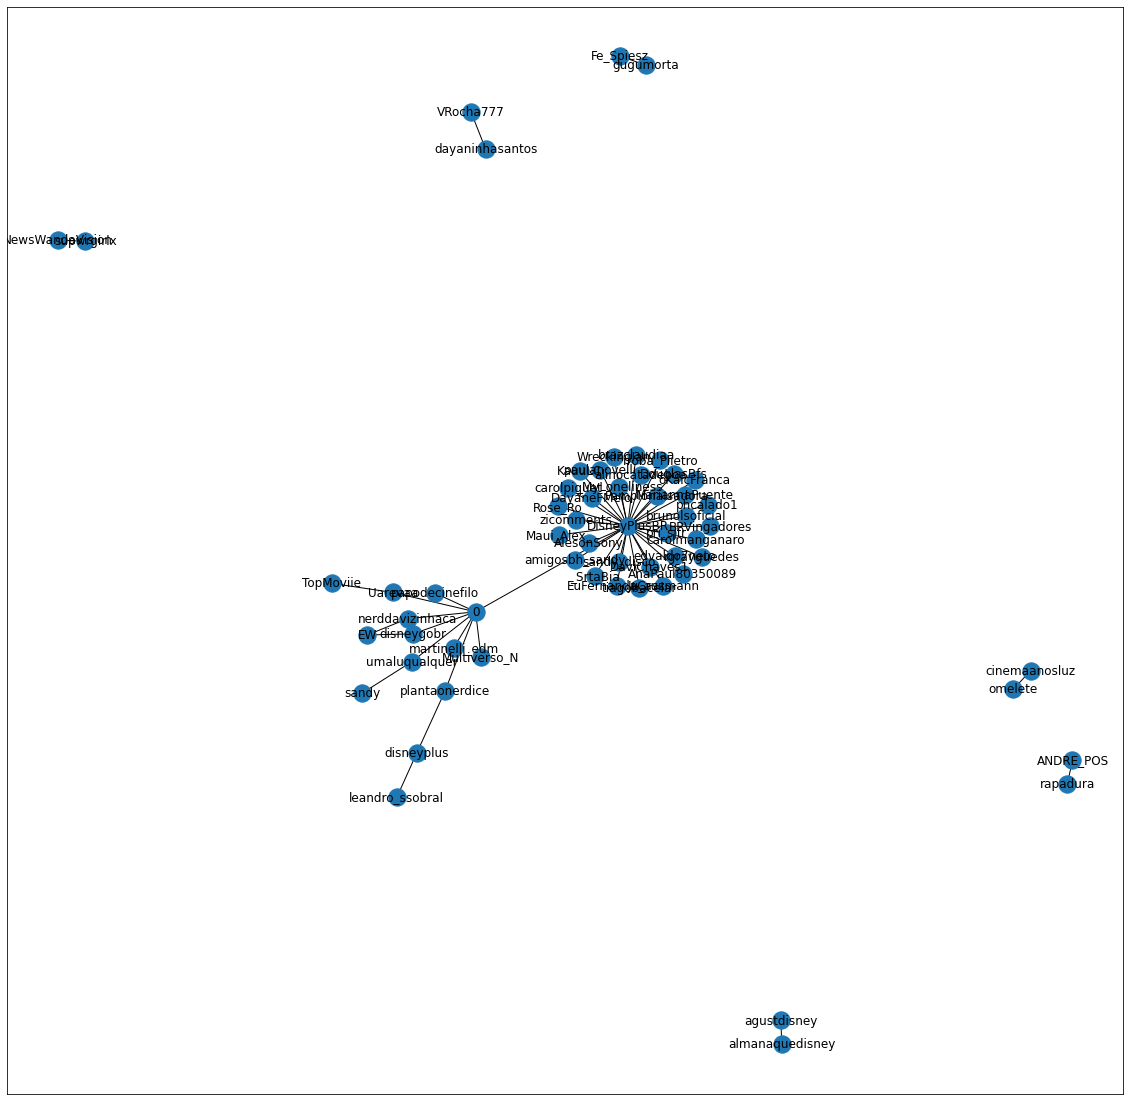

In [118]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=True)

## Get nodes

In [ ]:
mask4 = (data['created_at'] > '2020-11-17 12:00:00') & (data['created_at'] <= '2020-11-17 12:59:59')
subset = data[mask4].head(10)

In [ ]:
# Se eu adicionar apenas os edges, ele cria automaticamente os nodes.

In [ ]:
for index, tweet in subset.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    #tweet_sent = tweet["sentiment"]
    for interaction in interactions:
        int_id, int_name = interaction
        G.add_edge(user_name, int_name)
        

In [ ]:
nx.draw_networkx(G)

In [ ]:
G.clear()

In [ ]:
G.adjlist()